In [46]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [47]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Visualizing and cleaning the data

In [48]:
tree_df = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data_20231020.csv')

# new column called street name to match business df
def get_street_name(address):
    street_name = address.split(' ')[1:]
    street_name = ' '.join(street_name)
    street_name = street_name.replace('AVENUE', 'AVE').replace('STREET', 'ST')

    # Append "TH" to the end of numbers
    street_name = re.sub(r"(\d+)", r"\1TH", street_name)

    return street_name
tree_df['Address Street Name'] = tree_df['address'].apply(get_street_name)
tree_df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl,Address Street Name
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09,70TH AVE
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09,7TH AVE
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09,MORGAN AVE
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09,GRAND ST
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09,6TH ST


### Combining the 2 datasets

In [49]:
def merge_datasets(tree_df, business_df):
    # Merge the tree and business datasets
    business_df = business_df[business_df['Address Street Name'].notna()]
    business_df = business_df[business_df['License Status'] == "Active"]
    business_count_df = business_df.groupby("Address Street Name").size().reset_index(name="Number of Businesses")
    merged_df = tree_df.merge(business_count_df, on='Address Street Name', how='inner')
    return merged_df

In [50]:
business_df = pd.read_csv('Legally_Operating_Businesses_20231020.csv')
merged_df = merge_datasets(tree_df, business_df)

C:\Users\xchen\AppData\Local\Temp\ipykernel_23480\793347406.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  business_df = pd.read_csv('Legally_Operating_Businesses_20231020.csv')


### Box plot showing tree diameter

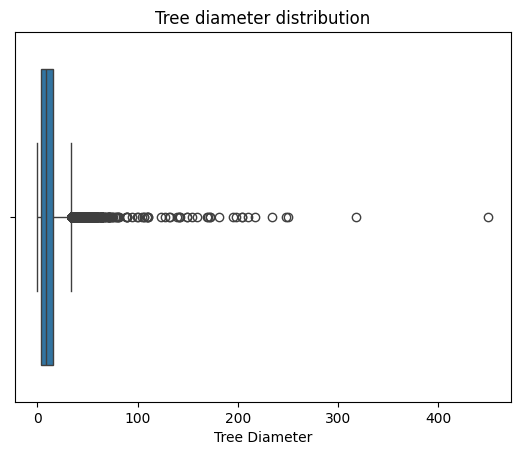

In [51]:
sns.boxplot(data=merged_df, x='tree_dbh')
plt.xlabel('Tree Diameter')
plt.title('Tree diameter distribution')
plt.show()

### Pie chart showing distrubution of tree health by percentage

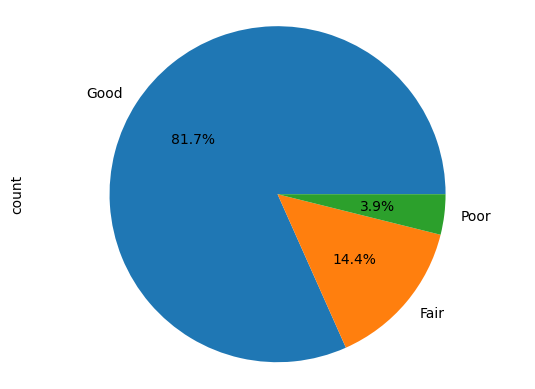

In [52]:
merged_df['health'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()


### Bar chart showing distribution of tree health by borough by count

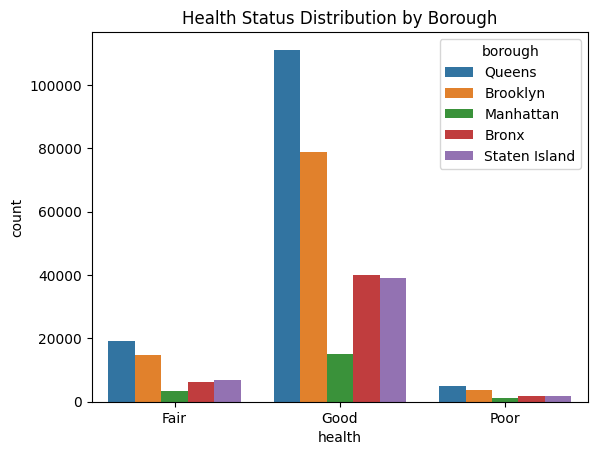

In [53]:
sns.countplot(data=merged_df, x='health', hue='borough')
plt.title('Health Status Distribution by Borough')
plt.show()


# Viewing dataframe

In [54]:
# Check unique values for tree health
merged_df['health'].unique()

array(['Fair', 'Good', nan, 'Poor'], dtype=object)

In [55]:
merged_df['curb_loc'].unique()

array(['OnCurb', 'OffsetFromCurb'], dtype=object)

In [56]:
print(len(merged_df))

364664


In [57]:
unique_trees = merged_df['spc_common'].unique()
unique_trees = [str(value) for value in unique_trees]
unique_trees = sorted(unique_trees)
unique_trees

["'Schubert' chokecherry",
 'American beech',
 'American elm',
 'American hophornbeam',
 'American hornbeam',
 'American larch',
 'American linden',
 'Amur cork tree',
 'Amur maackia',
 'Amur maple',
 'Atlantic white cedar',
 'Atlas cedar',
 'Callery pear',
 'Chinese chestnut',
 'Chinese elm',
 'Chinese fringetree',
 'Chinese tree lilac',
 'Cornelian cherry',
 'Douglas-fir',
 'English oak',
 'European alder',
 'European beech',
 'European hornbeam',
 'Himalayan cedar',
 'Japanese hornbeam',
 'Japanese maple',
 'Japanese snowbell',
 'Japanese tree lilac',
 'Japanese zelkova',
 'Kentucky coffeetree',
 'Kentucky yellowwood',
 'London planetree',
 'Norway maple',
 'Norway spruce',
 'Ohio buckeye',
 'Oklahoma redbud',
 'Osage-orange',
 'Persian ironwood',
 "Schumard's oak",
 'Scots pine',
 'Shantung maple',
 'Siberian elm',
 'Sophora',
 'Turkish hazelnut',
 'Virginia pine',
 'arborvitae',
 'ash',
 'bald cypress',
 'bigtooth aspen',
 'black cherry',
 'black locust',
 'black maple',
 'black o

In [58]:
print(len(unique_trees))

133


In [59]:
merged_df['nta'].unique()

array(['QN17', 'QN37', 'QN20', 'QN19', 'QN49', 'BK37', 'BK64', 'BK31',
       'BK32', 'BK34', 'MN11', 'QN23', 'BK30', 'MN03', 'BK40', 'MN17',
       'MN13', 'MN23', 'BK90', 'BX31', 'BK78', 'BK76', 'BK77', 'BK73',
       'MN28', 'MN24', 'MN27', 'MN14', 'MN12', 'MN09', 'SI14', 'BX40',
       'BX30', 'BX36', 'BX41', 'BX63', 'BX26', 'BX43', 'SI36', 'BK17',
       'BX28', 'BX05', 'QN72', 'QN70', 'QN68', 'QN31', 'BK69', 'BK68',
       'BK81', 'QN22', 'BK33', 'BK63', 'QN52', 'BK61', 'QN51', 'BK75',
       'QN54', 'BK38', 'SI35', 'SI22', 'BK35', 'BK29', 'QN27', 'QN63',
       'QN28', 'QN47', 'BK42', 'BK96', 'BK95', 'BK91', 'BK41', 'BK60',
       'BK88', 'SI05', 'QN25', 'QN57', 'QN10', 'QN26', 'QN53', 'QN56',
       'SI32', 'BX06', 'BX17', 'BX35', 'BX33', 'BX34', 'BX75', 'QN45',
       'MN36', 'MN04', 'QN50', 'BX29', 'QN29', 'MN06', 'MN35', 'MN01',
       'BX22', 'BK79', 'QN71', 'SI25', 'MN15', 'QN60', 'QN55', 'MN40',
       'MN33', 'MN34', 'MN20', 'BK46', 'BK28', 'BK26', 'BK44', 'SI45',
      

In [60]:
print(len(merged_df['st_senate'].unique()))
print(len(merged_df['boro_ct'].unique()))
print(len(merged_df['st_assem'].unique()))
print(len(merged_df['cncldist'].unique()))
print(len(merged_df['postcode'].unique()))


26
2091
65
51
187


# Cleaning dataset

In [61]:
cleaned_df = merged_df.dropna(subset=['health', 'latitude', 'longitude'])

# drop inital columns that are not useful
drop_cols = ['nta_name', 'state', 'created_at', 'bbl', 'bin', 'census tract', 'address', 
             'tree_id', 'block_id', 'spc_latin', 'borough', 'status', 'zip_city', 
             "Address Street Name", 'nta', 'boro_ct', 'postcode', 'st_assem']

# check for columns with missing values
for col in cleaned_df.columns:
    missing_count = cleaned_df[col].isna().sum()
    # if more than 30% missing, drop the column
    if missing_count > cleaned_df.shape[0] * 0.3:
        print(col, missing_count)
        drop_cols.append(col)
# Drop all the columns in drop_cols
cleaned_df = cleaned_df.drop(columns=drop_cols)

steward 262718
guards 308627
problems 225598


In [62]:
for col in cleaned_df.columns:
    missing_count = cleaned_df[col].isna().sum()
    if missing_count > 0:
        print(col, missing_count)

spc_common 2
sidewalk 1
council district 1987


In [63]:
# only 1 missing value for sidewalk so just drop it, same for spc_common
nan_count = cleaned_df['sidewalk'].isna().sum()
nan_count
cleaned_df = cleaned_df.dropna(subset=['sidewalk', 'spc_common'])

In [64]:
# impute council district with the most popular one
mode_council_district = cleaned_df['council district'].mode()[0]
cleaned_df['council district'].fillna(mode_council_district, inplace=True)

In [65]:
# Drop rows where tree health is missing
cleaned_df = cleaned_df.dropna(subset=['health'])

In [66]:
cleaned_df.to_csv('cleaned_data.csv', index=False)


In [67]:
cleaned_df.head()

,tree_dbh,stump_diam,curb_loc,health,spc_common,sidewalk,user_type,root_stone,root_grate,root_other,...,community board,borocode,cncldist,st_senate,latitude,longitude,x_sp,y_sp,council district,Number of Businesses
0,3,0,OnCurb,Fair,red maple,NoDamage,TreesCount Staff,No,No,No,...,406,4,29,16,40.723092,-73.844215,1027431.148,202756.7687,29.0,3
1,26,0,OnCurb,Good,London planetree,Damage,Volunteer,Yes,No,No,...,406,4,29,15,40.712641,-73.852138,1025241.512,198945.4690,29.0,3
2,23,0,OnCurb,Good,London planetree,Damage,Volunteer,Yes,No,No,...,406,4,29,15,40.712697,-73.852103,1025251.111,198965.7081,29.0,3
3,6,0,OnCurb,Good,London planetree,Damage,Volunteer,No,No,No,...,406,4,29,15,40.714987,-73.850661,1025649.379,199800.7215,29.0,3
4,15,0,OnCurb,Good,honeylocust,NoDamage,Volunteer,No,No,No,...,406,4,29,15,40.717602,-73.849151,1026066.572,200754.3397,29.0,3


# Create a map visualization

In [68]:
cleaned_df = cleaned_df.dropna(subset=['latitude', 'longitude'])

subset_data = cleaned_df.sample(n=min(10000, len(cleaned_df)), random_state=1)
m = folium.Map(location=[subset_data.iloc[0]['latitude'], subset_data.iloc[0]['longitude']], zoom_start=13)

# Function to choose a color based on the health of the tree
def color_producer(health_status):
    if health_status == 'Good':
        return 'green'
    elif health_status == 'Fair':
        return 'orange'
    elif health_status == 'Poor':
        return 'red'
    
# Add points to the map
for idx, row in subset_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_producer(row['health']),
        fill=True,
        fill_color=color_producer(row['health']),
        fill_opacity=0.7,
        popup=f"Health: {row['health']}<br>Species: {row['spc_common']}"
    ).add_to(m)

# Create a legend
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px; background-color: white;
     ">&nbsp; <b>Tree Health Legend</b> <br>
     &nbsp; Green: Good <br>
     &nbsp; Orange: Fair <br>
     &nbsp; Red: Poor <br>
</div>
''' 

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the updated map with a legend
m.save('tree_health_map.html')

# Data Transformation

In [69]:
# convert curb_loc to numeric
cleaned_df['curb_loc'] = cleaned_df['curb_loc'].apply(lambda x: 1 if x == 'OnCurb' else 0)

In [70]:
# convert tree health to numeric
health_encoding = {'Good': 1, 'Fair': 0, 'Poor': 0}
cleaned_df['health'] = cleaned_df['health'].map(health_encoding)

In [71]:
# convert sidewalk to numeric
cleaned_df['sidewalk'] = cleaned_df['sidewalk'].apply(lambda x: 1 if x == 'Damage' else 0)

In [72]:
# one hot encode user_type
cleaned_df = pd.get_dummies(cleaned_df, columns=['user_type'], dtype=int)


In [73]:
# remove latitude and longitude columns for model
cleaned_df = cleaned_df.drop(columns=['latitude', 'longitude', 'y_sp', 'x_sp'])

In [74]:
cleaned_df.head()

,tree_dbh,stump_diam,curb_loc,health,spc_common,sidewalk,root_stone,root_grate,root_other,trunk_wire,...,brch_other,community board,borocode,cncldist,st_senate,council district,Number of Businesses,user_type_NYC Parks Staff,user_type_TreesCount Staff,user_type_Volunteer
0,3,0,1,0,red maple,0,No,No,No,No,...,No,406,4,29,16,29.0,3,0,1,0
1,26,0,1,1,London planetree,1,Yes,No,No,No,...,No,406,4,29,15,29.0,3,0,0,1
2,23,0,1,1,London planetree,1,Yes,No,No,No,...,No,406,4,29,15,29.0,3,0,0,1
3,6,0,1,1,London planetree,1,No,No,No,Yes,...,Yes,406,4,29,15,29.0,3,0,0,1
4,15,0,1,1,honeylocust,0,No,No,No,No,...,No,406,4,29,15,29.0,3,0,0,1


In [75]:
changed_cols = ['root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']
for col in changed_cols:
    print(col, cleaned_df[col].unique())

root_stone ['No' 'Yes']
root_grate ['No' 'Yes']
root_other ['No' 'Yes']
trunk_wire ['No' 'Yes']
trnk_light ['No' 'Yes']
trnk_other ['No' 'Yes']
brch_light ['No' 'Yes']
brch_shoe ['No' 'Yes']
brch_other ['No' 'Yes']


In [76]:
# change the columns with No and Yes to numerical
changed_cols = ['root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']
for col in changed_cols:
    cleaned_df[col] = cleaned_df[col].apply(lambda x: 1 if x == 'Yes' else 0)
    

In [77]:
cleaned_df['spc_common'].nunique()



132

### Convert spc_common into numerical values

In [78]:
# encode spc_common
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cleaned_df['spc_common_encoded'] = le.fit_transform(cleaned_df['spc_common'].astype(str))
cleaned_df = cleaned_df.drop(columns=['spc_common'])

In [79]:
cleaned_df.head()

,tree_dbh,stump_diam,curb_loc,health,sidewalk,root_stone,root_grate,root_other,trunk_wire,trnk_light,...,community board,borocode,cncldist,st_senate,council district,Number of Businesses,user_type_NYC Parks Staff,user_type_TreesCount Staff,user_type_Volunteer,spc_common_encoded
0,3,0,1,0,0,0,0,0,0,0,...,406,4,29,16,29.0,3,0,1,0,103
1,26,0,1,1,1,1,0,0,0,0,...,406,4,29,15,29.0,3,0,0,1,31
2,23,0,1,1,1,1,0,0,0,0,...,406,4,29,15,29.0,3,0,0,1,31
3,6,0,1,1,1,0,0,0,1,0,...,406,4,29,15,29.0,3,0,0,1,31
4,15,0,1,1,0,0,0,0,0,0,...,406,4,29,15,29.0,3,0,0,1,82


In [80]:
# export transformed data
cleaned_df.to_csv('transformed_data.csv', index=False)

# Creating the machine learning models

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [82]:
# sampled_data = cleaned_df.sample(n=20000, random_state=1) # so i can run the models faster
sampled_data = cleaned_df

# balance the dataset
minority = sampled_data[sampled_data['health'] == 0]
majority_downsampled = sampled_data[sampled_data['health'] == 1].sample(len(minority), random_state=123)

sampled_data = pd.concat([majority_downsampled, minority])
y = sampled_data['health']
X = sampled_data.drop(columns=['health'])

In [83]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Logistic Regression

In [84]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_accuracy


0.570611434690626

In [85]:
lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_conf_matrix

array([[ 8590, 10583],
       [ 5857, 13257]], dtype=int64)

### KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Evaluating the model
knn_accuracy = accuracy_score(y_test, predictions)
knn_accuracy

0.6054013111499987

In [87]:
knn_conf_matrix = confusion_matrix(y_test, y_pred)
knn_conf_matrix


array([[ 8590, 10583],
       [ 5857, 13257]], dtype=int64)

### Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy


0.6171024107399379

In [89]:
dt_conf_matrix = confusion_matrix(y_test, y_pred)
dt_conf_matrix


array([[12123,  7050],
       [ 7610, 11504]], dtype=int64)

### random forest

In [90]:
def rf_grid_search():
    # Perform grid search
    param_grid = {
        'n_estimators': [50, 75, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4, 6]
    }
    # Grid search with cross-validation
    grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=123), 
                            param_grid=param_grid, 
                            cv=3, 
                            n_jobs=-1, 
                            verbose=2)

    grid_search.fit(X_train, y_train)

    # Best parameters
    best_params = grid_search.best_params_
    return best_params
rf_grid_search()

Fitting 3 folds for each of 192 candidates, totalling 576 fits


KeyboardInterrupt: 

In [ ]:
rf = RandomForestClassifier(max_depth= 30, min_samples_leaf= 2, min_samples_split= 2, n_estimators=150)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_accuracy = rf.score(X_test, y_test)
rf_accuracy

0.6727609893697599

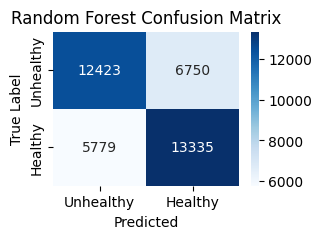

In [ ]:
# Calculate the confusion matrix
rf_conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unhealthy', 'Healthy'], yticklabels=['Unhealthy', 'Healthy'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')

plt.show()

# Results

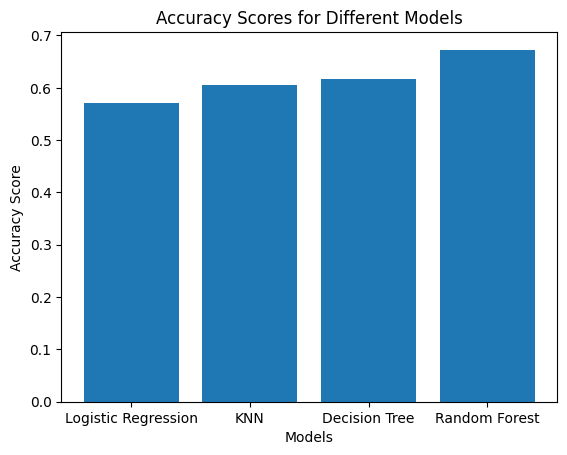

In [ ]:
accuracy_scores = [lr_accuracy, knn_accuracy, dt_accuracy, rf_accuracy]
labels = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy Score')
plt.xlabel('Models')
plt.title('Accuracy Scores for Different Models')
plt.show()


In [ ]:
def print_model_accs(labels, accuracy_scores):
    for label, score in zip(labels, accuracy_scores):
        print(f'{label}: {score}')
print_model_accs(labels, accuracy_scores)

Logistic Regression: 0.570611434690626
KNN: 0.6054013111499987
Decision Tree: 0.6174158330503826
Random Forest: 0.6727609893697599


Random Forest performed the best with an accuracy of .6734 while a simple logistic regression model performed the worse with an accuracy of .57